In [1]:
!pip install transformers

     |████████████████████████████████| 2.3MB 8.5MB/s 
     |████████████████████████████████| 3.3MB 38.6MB/s 
     |████████████████████████████████| 901kB 51.2MB/s 


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import BertForQuestionAnswering, BertTokenizer

In [3]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [4]:
question = "How many parameters does BERT-large have?"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."

In [5]:
input_ids = tokenizer.encode(question, answer_text)
tokens = tokenizer.convert_ids_to_tokens(input_ids)

sep_index = input_ids.index(tokenizer.sep_token_id)
num_seg_a = sep_index + 1
num_seg_b = len(input_ids) - num_seg_a
segment_ids = [0] * num_seg_a + [1] * num_seg_b

In [6]:
outputs = model(
    torch.tensor([input_ids]),
    token_type_ids = torch.tensor([segment_ids]),
    return_dict = True
)


In [7]:
start_tokens = outputs.start_logits
end_tokens = outputs.end_logits

start_pos = torch.argmax(start_tokens)
end_pos = torch.argmax(end_tokens)

In [8]:
answer = tokens[start_pos]

for i in range(start_pos+1, end_pos+1):
  if tokens[i][0:2] == '##':
    answer += tokens[i][2:]
  
  else:
    answer += ' ' + tokens[i]

print('The Answer is: ' + answer + ".")

The Answer is: 340m.


([<matplotlib.axis.YTick at 0x7fa5fdcd81d0>,
 <a list of 3 Text major ticklabel objects>)

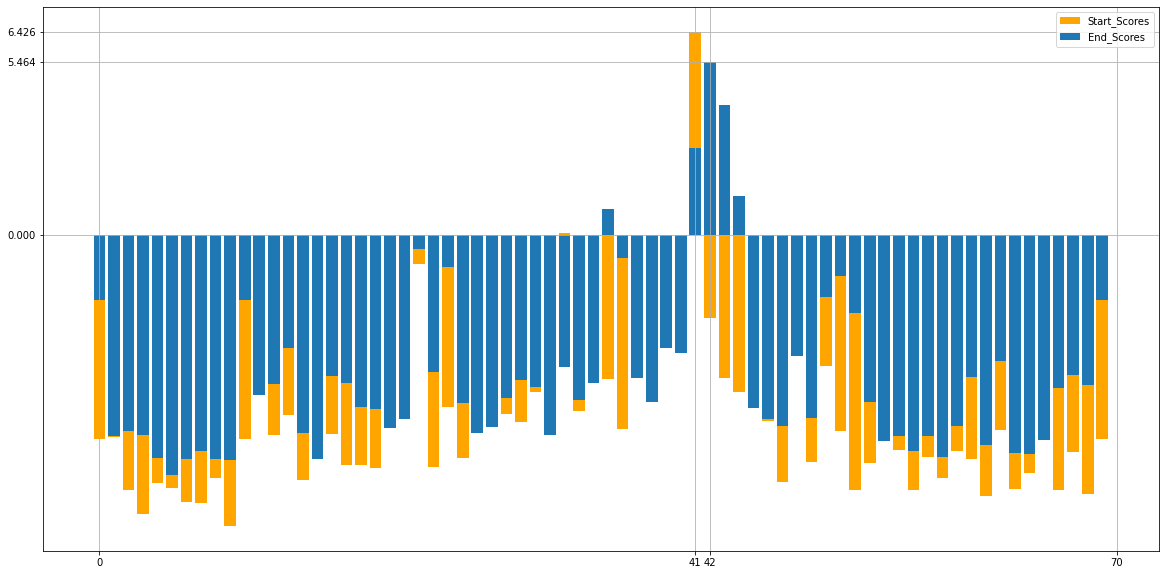

In [72]:
start_scores = start_tokens.detach().numpy().flatten()
end_scores = end_tokens.detach().numpy().flatten()


plt.figure(figsize=(20,10))
plt.bar(x=range(70), height=start_scores, color='Orange')
plt.bar(x=range(70), height=end_scores)

plt.legend(labels=["Start_Scores", "End_Scores"])

plt.grid(True)
plt.xticks([0,start_pos, end_pos, 70])
plt.yticks([0, start_scores[start_pos], end_scores[end_pos]])


In [103]:
text_split = ""
i=0; sequence_length=15; distance_betweeen_question_and_answer = 70
while i < len(tokens):
  if(i+sequence_length > len(tokens)): sequence_length = len(tokens) - i

  for token in range(i,i+sequence_length):
    text_split += tokens[token] + " "

  text_split += '\n'
  i+=sequence_length


print('='*(distance_betweeen_question_and_answer + 10))
print('TEXT')
print('------')
print(text_split)
print('='*(distance_betweeen_question_and_answer + 10) + '\n')
print('QUESTIONS' + " "*(distance_betweeen_question_and_answer - len('QUESTIONS')) + "ANSWERS")
print('----------' + " "*(distance_betweeen_question_and_answer - len('----------')) + '---------')
print(question + " "*(distance_betweeen_question_and_answer - len(question)) + answer)


TEXT
------
[CLS] how many parameters does bert - large have ? [SEP] bert - large is 
really big . . . it has 24 - layers and an em ##bed ##ding 
size of 1 , 02 ##4 , for a total of 340 ##m parameters ! 
altogether it is 1 . 34 ##gb , so expect it to take a couple 
minutes to download to your cola ##b instance . [SEP] 


QUESTIONS                                                             ANSWERS
----------                                                            ---------
How many parameters does BERT-large have?                             340m


In [104]:
def AnswerQuestions(questions, abstract):

  for question in questions:
    input_ids = tokenizer.encode(question, answer_text)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    sep_index = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0] * num_seg_a + [1] * num_seg_b

    outputs = model(
      torch.tensor([input_ids]),
      token_type_ids = torch.tensor([segment_ids]),
      return_dict = True
    )

    start_tokens = outputs.start_logits
    end_tokens = outputs.end_logits

    start_pos = torch.argmax(start_tokens)
    end_pos = torch.argmax(end_tokens)

    answer = tokens[start_pos]

    for i in range(start_pos+1, end_pos+1):
      if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
      
      else:
        answer += ' ' + tokens[i]

    print('The Answer is: ' + answer + ".")



In [107]:
question2 = "How many layers has Bert?"
question3 = "How many time does it get to download the colab instance?"
question_list = [question, question2, question3]

AnswerQuestions(questions=question_list, abstract=answer_text)

The Answer is: 340m.
The Answer is: 24.
The Answer is: a couple minutes.
